In [1]:
import scSpace
import scanpy as sc
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import numpy as np
import pandas as pd
import random
import torch
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

/home/qjy/anaconda3/envs/scspace_dev/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def setup_seed(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.cuda.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.enabled = False
    torch.backends.cudnn.benchmark = False
    
setup_seed(123)

In [3]:
sc_data_dir = 'data/intestines_sc_data.csv'
sc_meta_dir = 'data/intestines_sc_meta.csv'
st_data_dir = 'data/intestines_st_data.csv'
st_meta_dir = 'data/intestines_st_meta.csv'

sc_obj, st_obj = scSpace.load_data(
    sc_data_path=sc_data_dir, sc_meta_path=sc_meta_dir, 
    st_data_path=st_data_dir, st_meta_path=st_meta_dir,
    spatial_key=['V3','V4'])

Loading data...
Data have been loaded.


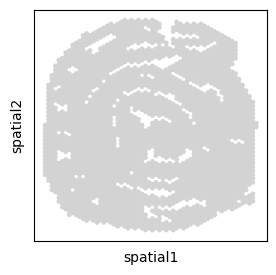

In [4]:
# ST reference 
plt.rcParams["figure.figsize"] = (3, 3)
sc.pl.embedding(st_obj, basis="spatial")

In [5]:
sc_obj, st_obj = scSpace.preporcess(sc_adata=sc_obj, st_adata=st_obj, st_type='spot', n_features=2000, normalize=True)

Data have been pre-processed.


In [6]:
sc.pp.filter_cells(st_obj, min_genes=1)

In [7]:
sc_obj, st_obj = scSpace.construct_pseudo_space(
    sc_adata=sc_obj,
    st_adata=st_obj,
    batch_size=128,
    activation='sigmoid',
    lr=0.001,
    epoch_num=1000,
    log_epoch=1000)

Beginning Transfer Component Analysis...
Transfer Component Analysis done.
Beginning training encoder for source domain...


100%|██████████| 1000/1000 [00:25<00:00, 39.53it/s]

Epoch [1000/1000]: Batch loss=315.37103271484375
Encoder for source domain training finished.


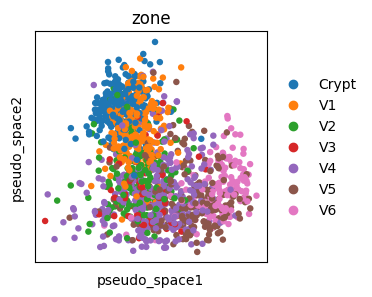

In [8]:
plt.rcParams["figure.figsize"] = (3, 3)
sc.pl.embedding(sc_obj, basis="pseudo_space", color='zone')

In [9]:
# calculate distacne
dist_res = scSpace.utils.cal_dist_group(
    sc_adata=sc_obj, 
    group_key='zone', 
    select_group='Crypt')

Calculating all cell pairs between Crypt and Crypt ...


100%|██████████| 235/235 [00:00<00:00, 1909.90it/s]


Calculating all cell pairs between Crypt and V1 ...


100%|██████████| 247/247 [00:00<00:00, 964.56it/s]


Calculating all cell pairs between Crypt and V2 ...


100%|██████████| 168/168 [00:00<00:00, 966.13it/s]


Calculating all cell pairs between Crypt and V3 ...


100%|██████████| 68/68 [00:00<00:00, 964.51it/s]


Calculating all cell pairs between Crypt and V4 ...


100%|██████████| 312/312 [00:00<00:00, 965.80it/s]


Calculating all cell pairs between Crypt and V5 ...


100%|██████████| 209/209 [00:00<00:00, 966.07it/s]


Calculating all cell pairs between Crypt and V6 ...


100%|██████████| 144/144 [00:00<00:00, 963.33it/s]


<AxesSubplot: >

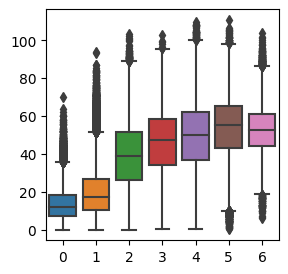

In [10]:
sns.boxplot(data=dist_res)